In [1]:
import sys
sys.path.append('../src')
import pickle
from clues import hierarchical_clustering, plot_seq,plot_3DMDS,set_node_colors
import numpy as np
import matplotlib.pyplot as plt
import random
import sequencer
import pickle
import seaborn as sns
import networkx as nx
import gravis as gv

/Users/cicero/miniconda3/envs/sequencer_pytorch/lib/python3.9/site-packages/torch_geometric/typing.py:72: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: dlopen(/Users/cicero/miniconda3/envs/sequencer_pytorch/lib/python3.9/site-packages/torch_scatter/_scatter_cpu.so, 0x0006): symbol not found in flat namespace '__ZN2at4_ops6narrow4callERKNS_6TensorExN3c106SymIntES6_'
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/Users/cicero/miniconda3/envs/sequencer_pytorch/lib/python3.9/site-packages/torch_geometric/typing.py:110: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: dlopen(/Users/cicero/miniconda3/envs/sequencer_pytorch/lib/python3.9/site-packages/torch_sparse/_diag_cpu.so, 0x0006): symbol not found in flat namespace '__ZN3c106detail19maybe_wrap_dim_slowIxEET_S2_S2_b'
  warnings.warn(f"An issue occurred while importing 'torch-sparse'. "


In [2]:
output_path = "out/"

fname1 = output_path+'distance_matrices.pkl'
with open(fname1, 'rb') as f:
    dis_matrices = pickle.load(f)
fname2 = output_path+'weighted_distance_matrix.pkl'
with open(fname2, 'rb') as f:
    sparse_dis_matrix_weighted = pickle.load(f)
    
fname3 = output_path+'final_products.pkl'
with open(fname3, 'rb') as f:
    final_products = pickle.load(f)

with open('data/lib_wave.pkl', 'rb') as f:
    grid = pickle.load(f)
    
fname4 = output_path+'final_mst.pkl'
with open(fname4, 'rb') as f:
    final_mst = pickle.load(f)

object_names = np.loadtxt('out/object_names.txt', 
                          dtype=str)
ind_shuffle = np.loadtxt('out/ind_shuffle.txt', dtype=int)



labels = {i:name for i,name in enumerate(np.array(object_names)[ind_shuffle])}
# Names too long, Assign some short names
short_names = [val for k,val in labels.items()]

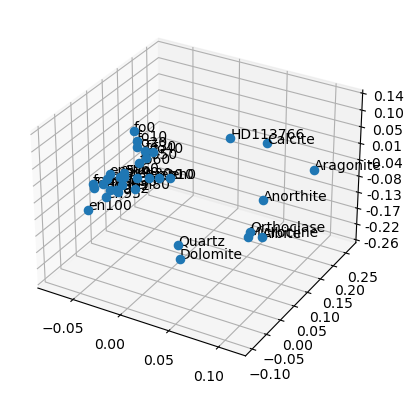

35 35
(595,)
0.0733636009734544
0.07050820285040778


In [3]:
MDS_pts = plot_3DMDS(sparse_dis_matrix_weighted, labels)

Optimal Cluster number is:  9


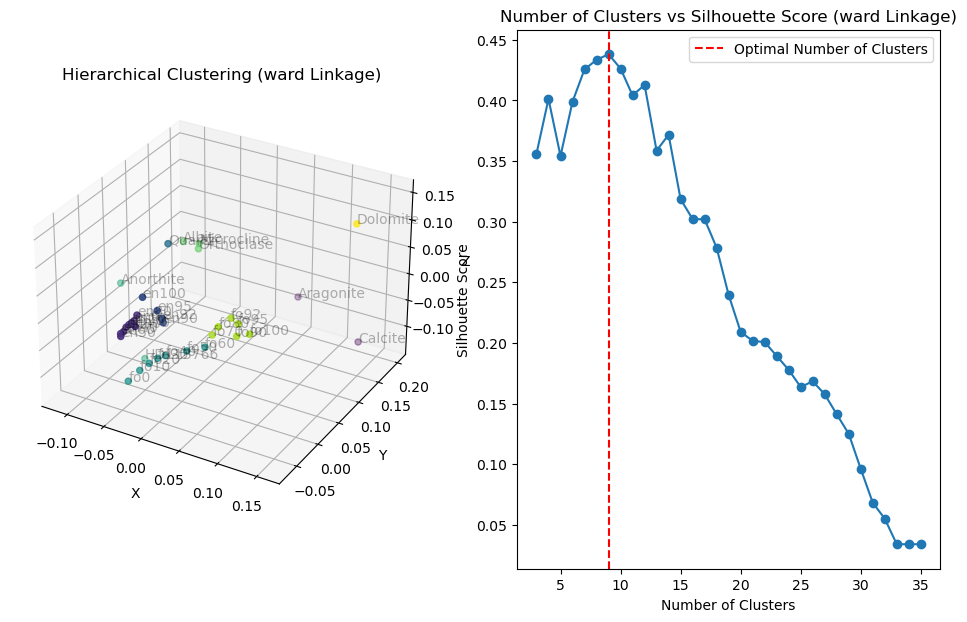

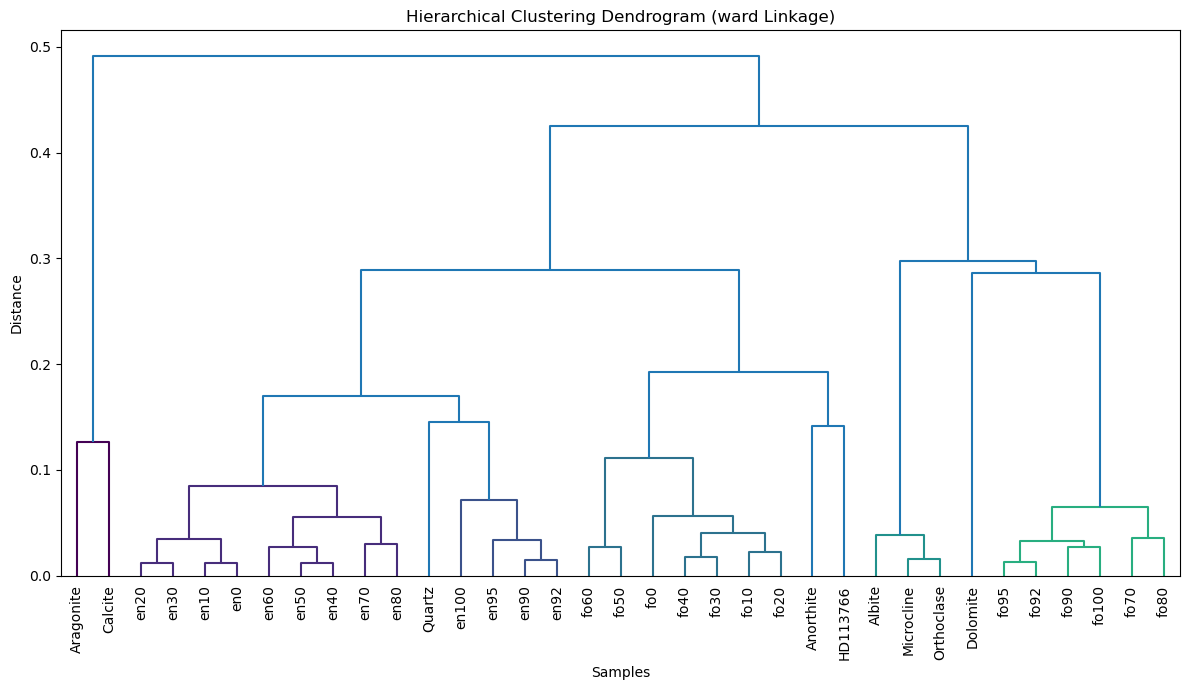

In [4]:
min_clusters = 3 # Minimum number of clusters to consider
len_of_arr, _ = np.shape(MDS_pts)
max_clusters = len_of_arr # Maximum number of clusters to consider

linkage_methods = ['ward'] # List of different linkage methods

# Perform hierarchical clustering and plot the results for each linkage method
for method in linkage_methods:
    hierarchical_clustering(sparse_dis_matrix_weighted, 
                            min_clusters, max_clusters, 
                            label_names = short_names,
                            method=method,
                           colormap_viridis={   1:'#fde725',
                                                2:'#addc30',
                                                3:'#5ec962',
                                                4:'#28ae80',
                                                5:'#21918c',
                                                6:'#2c728e',
                                                7:'#3b528b',
                                                8:'#472d7b',
                                                9:'#440154',
                                            }
                           )
    
    

Optimal Cluster number is:  9


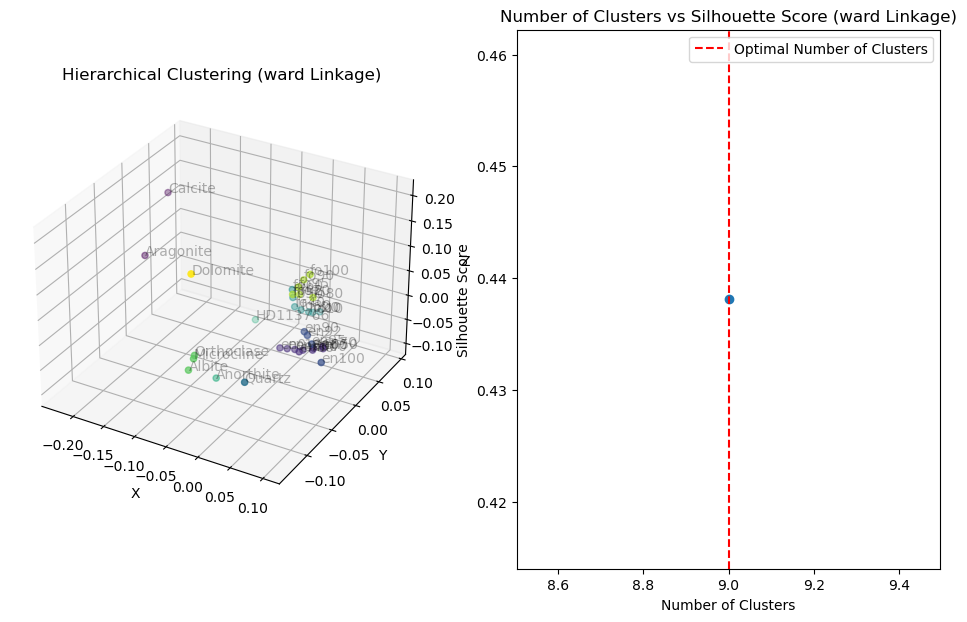

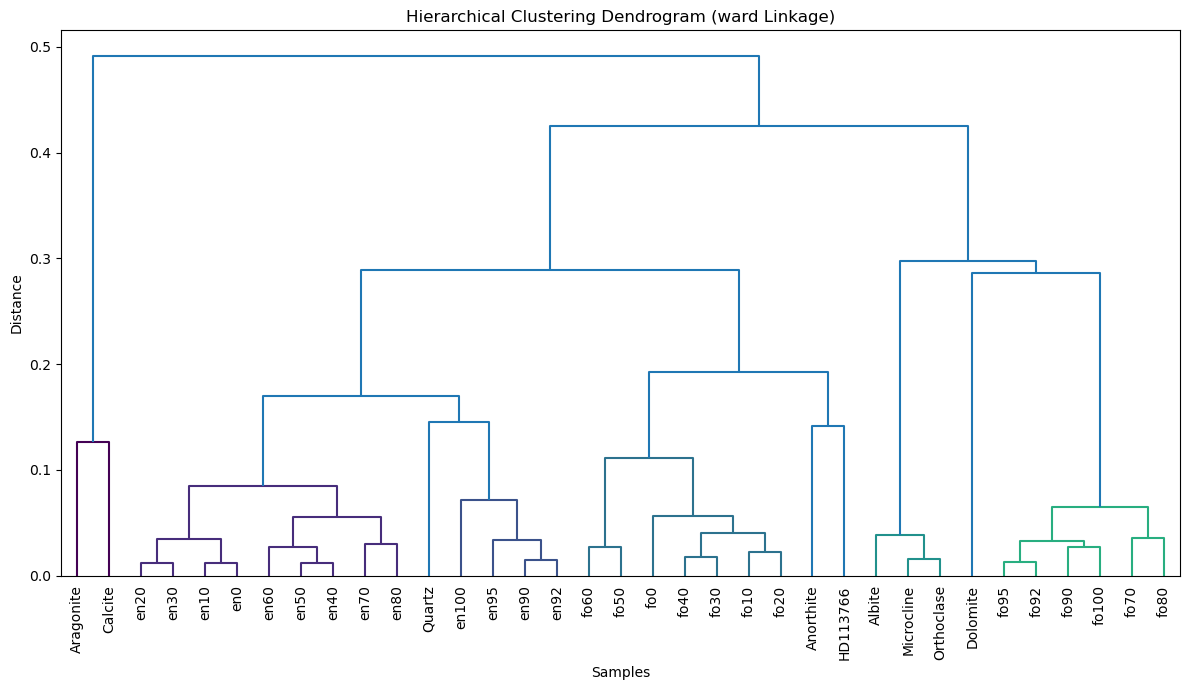

In [5]:
min_clusters = 9 # Minimum number of clusters to consider
len_of_arr, _ = np.shape(MDS_pts)
max_clusters = 9 # Maximum number of clusters to consider

linkage_methods = ['ward'] # List of different linkage methods

# Perform hierarchical clustering and plot the results for each linkage method
for method in linkage_methods:
    hierarchical_clustering(sparse_dis_matrix_weighted, 
                            min_clusters, max_clusters, 
                            label_names = short_names,
                            method=method,
                           colormap_viridis={   1:'#fde725',
                                                2:'#addc30',
                                                3:'#5ec962',
                                                4:'#28ae80',
                                                5:'#21918c',
                                                6:'#2c728e',
                                                7:'#3b528b',
                                                8:'#472d7b',
                                                9:'#440154',
                                            }
                           )
    

## Generate Some Labels for nodes in MST

In [6]:
labels_id= {}
labels_id = {int(i):{'name':name, 'clusterid':labels[i]} for i,name in enumerate(np.array(object_names)[ind_shuffle])}

## Generate the MST

In [8]:
# final_mst_labeled.nodes.data()


In [10]:
final_mst_labeled = final_mst.copy()
nx.set_node_attributes(final_mst_labeled, labels_id)
# set_node_colors(final_mst_labeled)

# got a TypeError: Object of type int32 is not JSON serializable
# Soln: 
gv.d3(final_mst_labeled,  
      node_label_data_source='name', 
      node_size_factor=3,
      graph_height=700)